In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from pathlib import Path

import sys
sys.path.append('../../function')
# Pytorch interpolation 1D
from torchinterp1d import Interp1d

folder = 'row_data/'
Path(folder).mkdir(parents=True, exist_ok=True)

In [31]:
num_curves = 3000 # num of curves for each class
seq_len = 1000 # datapoints

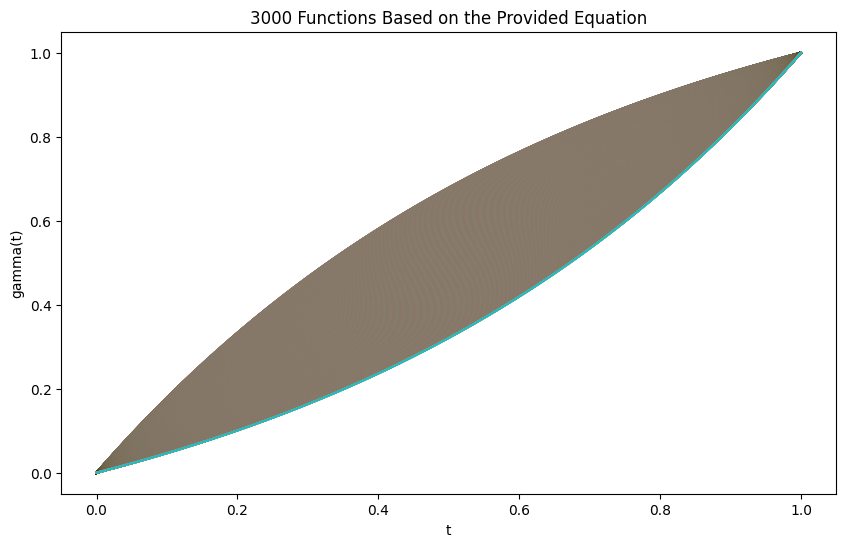

In [32]:
# no sub-class
# generate gammas
n_length = seq_len
a_values = np.linspace(-1.5, 1.5, num_curves) 

# Generate the x-axis (t)
t = np.linspace(0, 1, n_length)

# Generate the 10 functions
functions_each_type_A = []
for a_i in a_values:
    y_i = (np.exp(a_i * t) - 1) / (np.exp(a_i) - 1) if a_i != 0 else t
    functions_each_type_A.append(y_i)

# Plot the functions
fig, ax = plt.subplots(figsize=(10, 6))
for i, y_i in enumerate(functions_each_type_A):
    ax.plot(t, y_i, label=f"a={a_values[i]:.2f}")
ax.set_xlabel("t")
ax.set_ylabel("gamma(t)")
ax.set_title(f"{num_curves} Functions Based on the Provided Equation")
plt.show()

In [33]:
gammas_A = np.array(functions_each_type_A)
gammas_A.shape

(3000, 1000)

class A

In [34]:
# Create a figure for plotting
plt.figure(figsize=(8, 6))
# Create an array of x values
x = np.linspace(0, seq_len, seq_len)
# 2 peaks scenario
# base functions b1 & b2 (where each is a single peak function)
p_r_b1 = 60
p_r_b2 = 75
# for b1
# Randomly choose a location for the peak of the Gaussian curve
peak_location_b1 = 250
# Randomly choose the width of the peak, which affects how "fat" or "thin" the peak is
peak_range_b1 = p_r_b1
# Randomly choose the height of the peak
peak_height_b1 = 13

# for b2
peak_location_b2 = 715
peak_range_b2 = p_r_b2
peak_height_b2 = 12.5
"""
# for b3
peak_location_b3 = 800
peak_range_b3 = 10
peak_height_b3 = 1.12
"""
# type 1
y_type1_b1 = peak_height_b1 * np.exp(-0.5 * ((x - peak_location_b1) ** 2) / peak_range_b1 ** 2)
y_type1_b2 = peak_height_b2 * np.exp(-0.5 * ((x - peak_location_b2) ** 2) / peak_range_b2 ** 2)
# y_type1_b3 = peak_height_b3 * np.exp(-0.5 * ((x - peak_location_b3) ** 2) / peak_range_b3 ** 2)
y_type1 = y_type1_b1 + y_type1_b2

<Figure size 800x600 with 0 Axes>

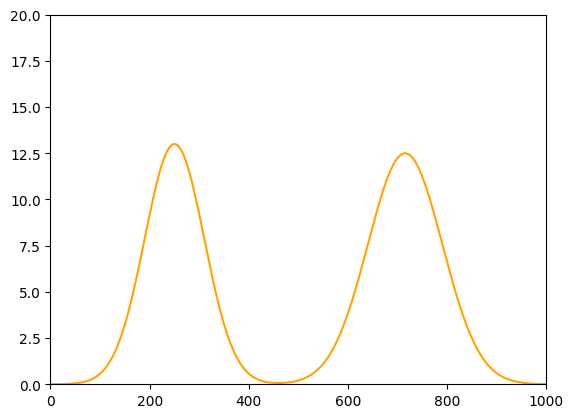

In [35]:
plt.plot(x, y_type1, color='orange')
plt.xlim(0, seq_len)
plt.ylim(-0, 20)
plt.show()

In [36]:
import random

data_A = np.zeros((num_curves, seq_len))
data_A[0, :] = y_type1
# for the rest "num_curves-1"
# we add small noises on range and height to simulate small difference between individuals
for i in range(1, num_curves):
    peak_location_b1i = peak_location_b1 # fixed
    peak_range_b1i = peak_range_b1 + random.randint(-2, 2)
    peak_height_b1i = peak_height_b1 + random.uniform(-0.5, 0.5)
    
    peak_location_b2i = peak_location_b2 # fixed
    peak_range_b2i = peak_range_b2 + random.randint(-3, 3)
    peak_height_b2i = peak_height_b2 + random.uniform(-1, 1)

    y_b1i = peak_height_b1i * np.exp(-0.5 * ((x - peak_location_b1i) ** 2) / peak_range_b1i ** 2)
    y_b2i = peak_height_b2i * np.exp(-0.5 * ((x - peak_location_b2i) ** 2) / peak_range_b2i ** 2)

    y_i = y_b1i + y_b2i

    data_A[i, :] = y_i


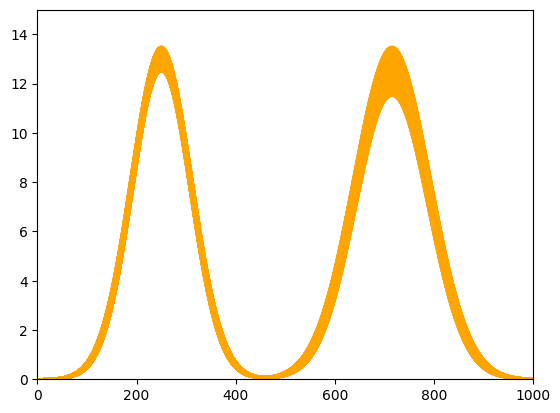

In [37]:
for i in range(num_curves):
    plt.plot(x, data_A[i, :], 'orange', alpha=0.2)
plt.xlim(0, seq_len)
plt.ylim(0, 15)
plt.show()

In [38]:
 #################  Apply f@r  #######################
length_adjust = seq_len - 1
xid_train = torch.arange(seq_len).repeat(num_curves, 1)
# f @ r
input_f = torch.as_tensor(data_A) # (num_curves, seq_length)
r = torch.as_tensor(gammas_A)
f_r_A = Interp1d()(xid_train, input_f.squeeze(1), r * (length_adjust))
f_r_A = f_r_A.numpy()
f_r_A.shape

(3000, 1000)

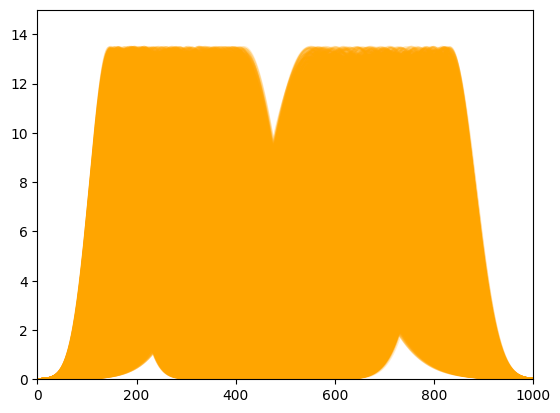

In [39]:
for i in range(num_curves):
    plt.plot(x, f_r_A[i, :], 'orange', alpha=0.2)
plt.xlim(0, seq_len)
plt.ylim(0, 15)
plt.show()

class B

In [40]:
data_B = np.zeros((num_curves, seq_len))

In [41]:
# Create a figure for plotting
plt.figure(figsize=(8, 6))
# Create an array of x values
x = np.linspace(0, seq_len, seq_len)
# 2 peaks scenario
# base functions b1 & b2 (where each is a single peak function)
p_r_b1 = 60
p_r_b2 = 100
# for b1
# Randomly choose a location for the peak of the Gaussian curve
peak_location_b1 = 225
# Randomly choose the width of the peak, which affects how "fat" or "thin" the peak is
peak_range_b1 = p_r_b1
# Randomly choose the height of the peak
peak_height_b1 = 12

# for b2
peak_location_b2 = 695
peak_range_b2 = p_r_b2
peak_height_b2 = 13
"""
# for b3
peak_location_b3 = 800
peak_range_b3 = 10
peak_height_b3 = 1.12
"""
# type 1
y_type1_b1 = peak_height_b1 * np.exp(-0.5 * ((x - peak_location_b1) ** 2) / peak_range_b1 ** 2)
y_type1_b2 = peak_height_b2 * np.exp(-0.5 * ((x - peak_location_b2) ** 2) / peak_range_b2 ** 2)
# y_type1_b3 = peak_height_b3 * np.exp(-0.5 * ((x - peak_location_b3) ** 2) / peak_range_b3 ** 2)
y_type1 = y_type1_b1 + y_type1_b2

<Figure size 800x600 with 0 Axes>

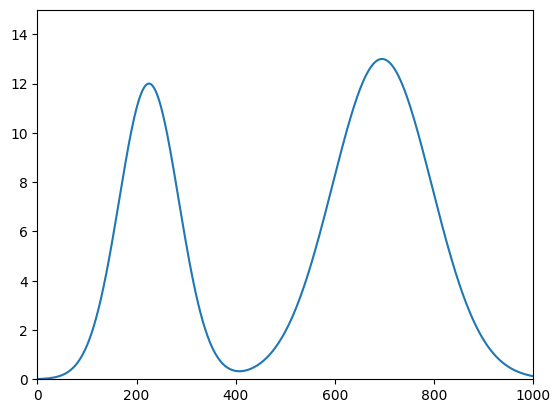

In [42]:
plt.plot(x, y_type1)
plt.xlim(0, seq_len)
plt.ylim(-0, 15)
plt.show()

In [43]:
data_B[0, :] = y_type1
# for the rest "num_curves-1"
# we add small noises on range and height to simulate small difference between individuals
for i in range(1, num_curves):
    peak_location_b1i = peak_location_b1 # fixed
    peak_range_b1i = peak_range_b1 + random.randint(-3, 3)
    peak_height_b1i = peak_height_b1 + random.uniform(-1, 1)
    
    peak_location_b2i = peak_location_b2 # fixed
    peak_range_b2i = peak_range_b2 + random.randint(-3, 3)
    peak_height_b2i = peak_height_b2 + random.uniform(-1.5, 1.5)

    y_b1i = peak_height_b1i * np.exp(-0.5 * ((x - peak_location_b1i) ** 2) / peak_range_b1i ** 2)
    y_b2i = peak_height_b2i * np.exp(-0.5 * ((x - peak_location_b2i) ** 2) / peak_range_b2i ** 2)

    y_i = y_b1i + y_b2i

    data_B[i, :] = y_i


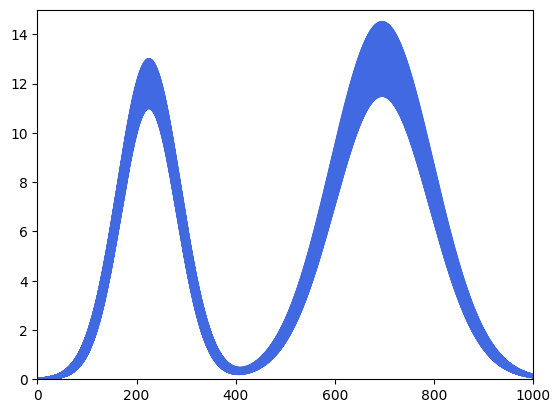

In [44]:
for i in range(num_curves):
    plt.plot(x, data_B[i, :], 'royalblue', alpha=0.2)
plt.xlim(0, seq_len)
plt.ylim(0, 15)
plt.show()

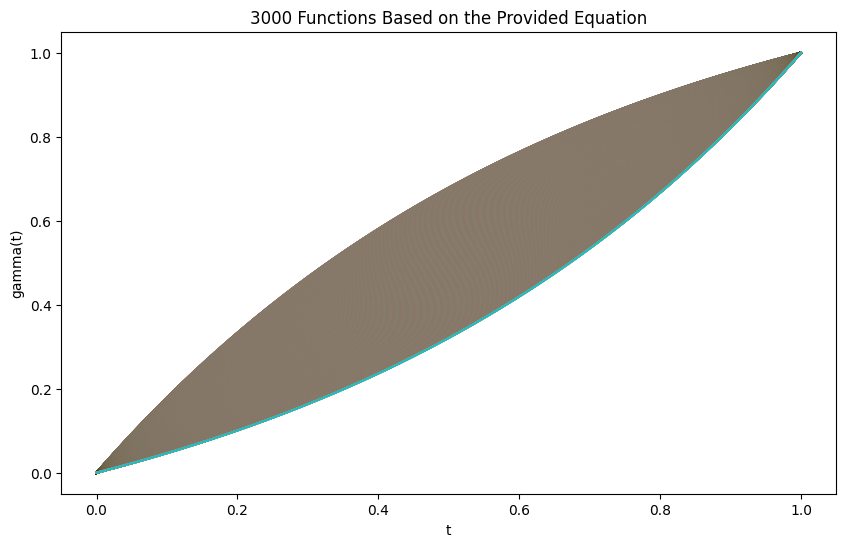

In [45]:
# no sub-class
# generate gammas
n_length = seq_len
a_values = np.linspace(-1.5, 1.5, num_curves) 

# Generate the x-axis (t)
t = np.linspace(0, 1, n_length)

# Generate the 10 functions
functions_each_type_B = []
for a_i in a_values:
    y_i = (np.exp(a_i * t) - 1) / (np.exp(a_i) - 1) if a_i != 0 else t
    functions_each_type_B.append(y_i)

# Plot the functions
fig, ax = plt.subplots(figsize=(10, 6))
for i, y_i in enumerate(functions_each_type_B):
    ax.plot(t, y_i, label=f"a={a_values[i]:.2f}")
ax.set_xlabel("t")
ax.set_ylabel("gamma(t)")
ax.set_title(f"{num_curves} Functions Based on the Provided Equation")
plt.show()

In [46]:
gammas_B = np.array(functions_each_type_B)

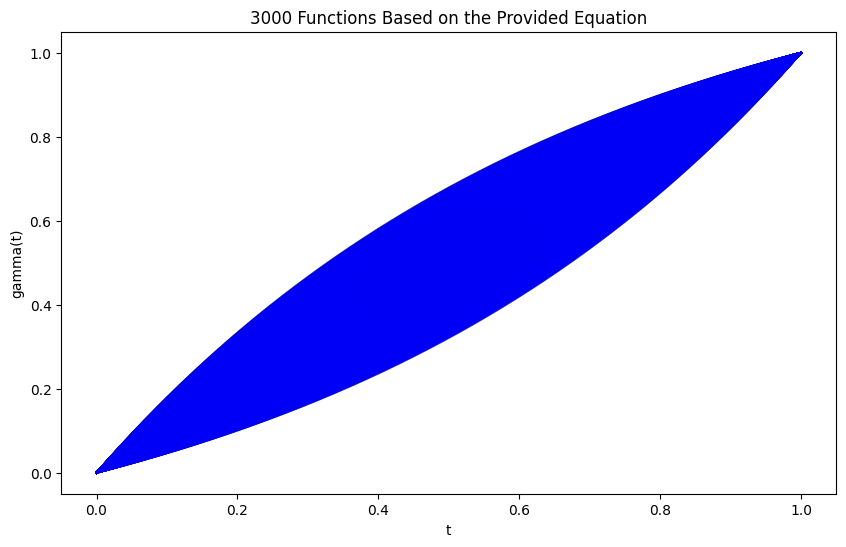

In [47]:
# Plot the functions
fig, ax = plt.subplots(figsize=(10, 6))
for i, y_i in enumerate(functions_each_type_A):
    ax.plot(t, y_i, label=f"a={a_values[i]:.2f}", color = "yellow", alpha = 0.1)
for i, y_i in enumerate(functions_each_type_B):
    ax.plot(t, y_i, label=f"a={a_values[i]:.2f}", color = "blue", alpha = 0.1)
ax.set_xlabel("t")
ax.set_ylabel("gamma(t)")
ax.set_title(f"{num_curves} Functions Based on the Provided Equation")
plt.show()

In [48]:
 #################  Apply f@r  #######################
length_adjust = seq_len - 1
xid_train = torch.arange(seq_len).repeat(num_curves, 1)
# f @ r
input_f = torch.as_tensor(data_B) # (num_curves, seq_length)
r = torch.as_tensor(gammas_B)
f_r_B = Interp1d()(xid_train, input_f.squeeze(1), r * (length_adjust))
f_r_B = f_r_B.numpy()
f_r_B.shape

(3000, 1000)

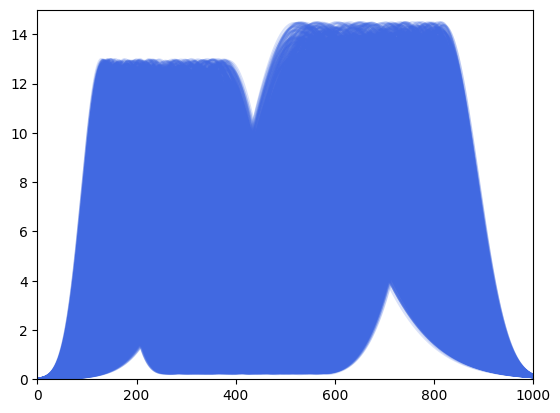

In [49]:
for i in range(num_curves):
    plt.plot(x, f_r_B[i, :], 'royalblue', alpha=0.2)
plt.xlim(0, seq_len)
plt.ylim(0, 15)
plt.show()

In [50]:
# add some noise
noise_scale = 0.05
for i in range(num_curves):
    # Add some smooth noise to the curve
    # This is done by generating random noise, smoothing it with a moving average, and adding it to the y values
    ##############################################################################
    np.random.seed(3407)
    noise = np.random.normal(0, noise_scale, size=x.shape)
    # smooth_noise = np.convolve(noise, np.ones(5)/5, mode='same')
    smooth_noise = np.convolve(noise, np.ones(50)/50, mode='same')
    f_r_A[i, :] += smooth_noise
    f_r_B[i, :] += smooth_noise
    ##############################################################################

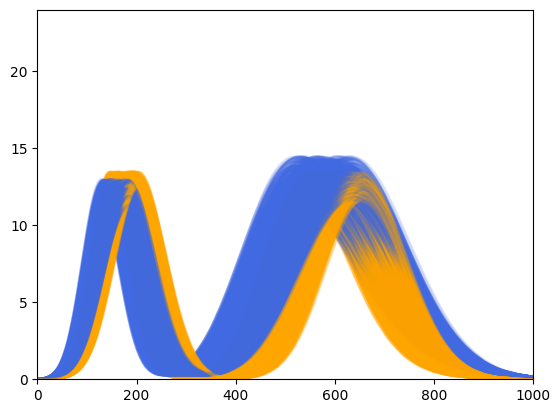

In [51]:
for i in range(num_curves):
    if i < 1000:
        plt.plot(x, f_r_A[i, :], 'orange', alpha=0.2)
        plt.plot(x, f_r_B[i, :], 'royalblue', alpha=0.2)
plt.xlim(0, seq_len)
plt.ylim(-0, 24)
plt.show()

In [52]:
f_r_A.shape, f_r_B.shape

((3000, 1000), (3000, 1000))

In [53]:
data_A.shape, data_B.shape

((3000, 1000), (3000, 1000))

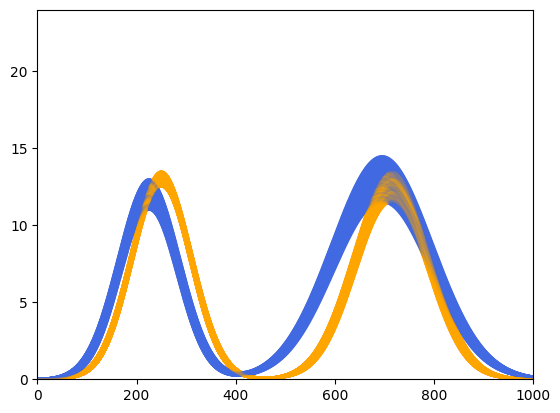

In [54]:
for i in range(num_curves):
    if i < 1000:
        plt.plot(x, data_A[i, :], 'orange', alpha=0.2)
        plt.plot(x, data_B[i, :], 'royalblue', alpha=0.2)
plt.xlim(0, seq_len)
plt.ylim(-0, 24)
plt.show()

In [55]:
true_signal_data_A_df = pd.DataFrame(data_A)
true_signal_data_B_df = pd.DataFrame(data_B)
true_signal_data_A_df.to_csv('row_data/allTrueSignals_0.csv', index=False, header=False)
true_signal_data_B_df.to_csv('row_data/allTrueSignals_1.csv', index=False, header=False)

In [56]:
true_signal_data_A_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.002208,0.002367,0.002536,0.002717,0.002909,0.003115,0.003334,0.003568,0.003817,0.004082,...,0.014335,0.013647,0.012989,0.012361,0.011762,0.011189,0.010642,0.010120,0.009623,0.009148
1,0.001599,0.001718,0.001846,0.001982,0.002127,0.002283,0.002449,0.002627,0.002817,0.003019,...,0.024647,0.023551,0.022500,0.021493,0.020527,0.019601,0.018714,0.017864,0.017050,0.016270
2,0.002858,0.003057,0.003268,0.003493,0.003732,0.003987,0.004258,0.004547,0.004853,0.005179,...,0.016384,0.015618,0.014884,0.014183,0.013512,0.012871,0.012258,0.011673,0.011113,0.010579
3,0.001203,0.001295,0.001395,0.001501,0.001616,0.001738,0.001869,0.002010,0.002160,0.002321,...,0.014331,0.013643,0.012985,0.012358,0.011758,0.011185,0.010639,0.010117,0.009620,0.009145
4,0.001243,0.001339,0.001442,0.001552,0.001670,0.001797,0.001933,0.002078,0.002233,0.002400,...,0.022800,0.021786,0.020814,0.019882,0.018988,0.018132,0.017311,0.016525,0.015772,0.015051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.003022,0.003231,0.003455,0.003693,0.003946,0.004215,0.004502,0.004806,0.005130,0.005475,...,0.015096,0.014372,0.013679,0.013018,0.012386,0.011783,0.011207,0.010658,0.010134,0.009633
2996,0.003036,0.003247,0.003472,0.003711,0.003965,0.004236,0.004524,0.004830,0.005156,0.005502,...,0.010311,0.009789,0.009292,0.008819,0.008368,0.007938,0.007529,0.007140,0.006770,0.006418
2997,0.001223,0.001318,0.001419,0.001527,0.001643,0.001768,0.001901,0.002044,0.002197,0.002361,...,0.022443,0.021445,0.020488,0.019570,0.018691,0.017848,0.017040,0.016266,0.015525,0.014815
2998,0.001694,0.001820,0.001954,0.002099,0.002253,0.002418,0.002594,0.002782,0.002983,0.003197,...,0.025434,0.024303,0.023218,0.022178,0.021182,0.020226,0.019311,0.018434,0.017594,0.016789


In [57]:
# also, save the original true signals
data_A_df = pd.DataFrame(data_A)
data_B_df = pd.DataFrame(data_B)
true_signals = pd.concat([data_A_df, data_B_df], ignore_index=True)
true_signals.to_csv('row_data/allTrueSignals.csv', index=False, header=False)

In [58]:
# (save data and gammas)
# now form the data into a dataframe, with label=0 for class A and label=1 for class B
# the label is added to the last column
data_A_df = pd.DataFrame(f_r_A)
data_A_df['label'] = 0
data_B_df = pd.DataFrame(f_r_B)
data_B_df['label'] = 1
# combine
data_syn = pd.concat([data_A_df, data_B_df], ignore_index=True)
data_syn.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,label
0,0.001092,0.001855,0.003398,0.003021,0.001142,0.001162,0.001791,0.001056,0.001989,0.003067,...,0.012576,0.012221,0.010489,0.008609,0.008218,0.007042,0.005879,0.004581,0.005354,0
1,0.000484,0.001168,0.002622,0.002147,0.000159,0.000058,0.000552,-0.000332,0.000436,0.001332,...,0.020808,0.020305,0.018430,0.016407,0.015876,0.014563,0.013265,0.011835,0.012476,0
2,0.001742,0.002584,0.004213,0.003932,0.002160,0.002296,0.003053,0.002459,0.003547,0.004795,...,0.014226,0.013842,0.012081,0.010173,0.009754,0.008552,0.007362,0.006038,0.006785,0
3,0.000087,0.000718,0.002115,0.001574,-0.000486,-0.000668,-0.000265,-0.001248,-0.000591,0.000183,...,0.012576,0.012221,0.010488,0.008608,0.008216,0.007040,0.005877,0.004578,0.005351,0
4,0.000128,0.000765,0.002169,0.001636,-0.000415,-0.000587,-0.000171,-0.001142,-0.000469,0.000322,...,0.019380,0.018905,0.017057,0.015061,0.014556,0.013270,0.011997,0.010591,0.011257,0


In [59]:
data_syn.to_csv('row_data/data_more_drastic.csv', index=False, header=False)